# Lyco 24h plate per person 27.03.2019 - Analysis
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [2]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [3]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [4]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.4
   pandas: 0.23.4
   seaborn: 0.9.0


# Alon's Data

## Loading the data

In [6]:
data_path = "../Data/Lyco/Lyco plate per person 27.03.2019/Alon 24h - agg_results.csv"
df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)
df.columns = df.columns.str.replace("GFER", "Cox17") # This is due to a naming mistake at the data creation

In [7]:
df.sample(7)

Actin_avg  Actin_max  Actin_q10  Actin_q50  Actin_q90  Actin_size  Actin_std  Actin_sum  Cyto_area  Cyto_aspect_ratio   Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity   Cyto_std   Cyto_sum  Cyto_w  Cox17_avg  Cox17_in_MitoTracker_avg  Cox17_in_MitoTracker_max  Cox17_in_MitoTracker_q10  Cox17_in_MitoTracker_q50  Cox17_in_MitoTracker_q90  Cox17_in_MitoTracker_size  Cox17_in_MitoTracker_std  Cox17_in_Nucli_avg  Cox17_in_Nucli_max  Cox17_in_Nucli_q10  Cox17_in_Nucli_q50  Cox17_in_Nucli_q90  Cox17_in_Nucli_size  Cox17_in_Nucli_std  Cox17_max  Cox17_outside_MitoTracker_avg  Cox17_outside_MitoTracker_max  Cox17_outside_MitoTracker_q10  Cox17_outside_MitoTracker_q50  Cox17_outside_MitoTracker_q90  Cox17_outside_MitoTracker_size  Cox17_outside_MitoTracker_std  Cox17_outside_Nucli_avg  Cox17_outside_Nucli_max  \
26412   5.970393       28.0        3.0        6.0       10.0     15638.0   2.871143    93365.0    51719.0           0.612091   3.477468                     0.353955    795.0    910.0     0.536109   397.0      13.0                   147708.230423     1251.602159       2.0       2.0       8.0         96471.0    52282.0       0.799898   2.718336   181809.0   243.0   3.000000                  2.999714                      15.0                       2.0                       2.0                       5.0                     3499.0                  1.661648            2.169195                 6.0                 2.0                 2.0                 3.0                857.0            0.497915       15.0                       3.022222                           11.0                            2.0                            2.0                            5.0                            45.0                       1.926296                 3.264980                     15.0   
15282   3.358163       29.0        2.0        3.0        5.0     73486.0   1.646299   246778.0   118306.0           0.831974  17.046747                     0.398817   1129.0   1669.0     0.378422   613.0     126.0                   294738.879200     2576.008352       4.0      11.0      42.0        312630.0   117547.0       0.627453  17.280558  2003794.0   510.0   2.442065                  2.442416                       8.0                       2.0                       2.0                       4.0                    17635.0                  0.892405            2.300370                 5.0                 2.0                 2.0                 3.0               2164.0            0.515365        8.0                       2.000000                            2.0                            2.0                            2.0                            2.0                            14.0                       0.000000                 2.461866                      8.0   
17085   3.477633       13.0        2.0        3.0        6.0     10462.0   1.660264    36383.0    28553.0           3.272222  14.892756                     0.108586    771.0    513.0     0.269317   180.0      65.0                   273589.683684     1491.518895       3.0      10.0      35.0        106020.0    29708.0       0.481140  13.118193   442434.0   589.0   2.511196                  2.513643                       8.0                       2.0                       2.0                       4.0                     2089.0                  1.030381            2.328782                 8.0                 2.0                 2.0                 3.0                952.0            0.804459        8.0                       2.000000                            2.0                            2.0                            2.0                            2.0                            10.0                       0.000000                 2.662598                      8.0   
703     2.815813        8.0        2.0        3.0        4.0      6678.0   0.945937

In [8]:
# Adding Compunds and concentration 
df["Compound"] = np.nan
df.loc[df.column.isin([2, 3]), "Compound"] = "Control"
df.loc[df.column.isin([4, 5]), "Compound"] = "DMSO"
df.loc[df.column.isin([6, 7]), "Compound"] = "Lyco Low"
df.loc[df.column.isin([8, 9]), "Compound"] = "Lyco Medium"
df.loc[df.column.isin([10, 11]), "Compound"] = "Lyco High"
display('ok'if df["Compound"].isna().any()==False else ':-(')



'ok'

In [9]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column       2        3     4     5         6         7            8            9          10         11
row                                                                                                     
B       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
C       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
D       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
E       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
F       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
G       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High

## Number of cells 

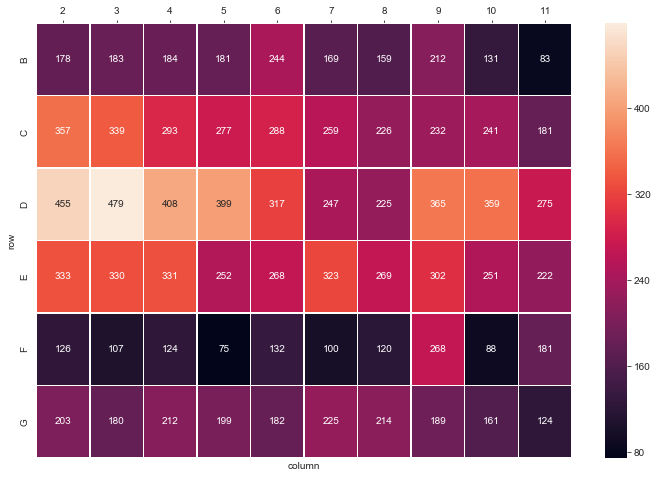

In [10]:
cell_in_well = df.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [11]:
order = ['Control', 'DMSO', 
         'Lyco Low', 'Lyco Medium', 'Lyco High'
        ]

Compound   row
0      Control  3270
1         DMSO  2935
2    Lyco High  2297
3     Lyco Low  2754
4  Lyco Medium  2781

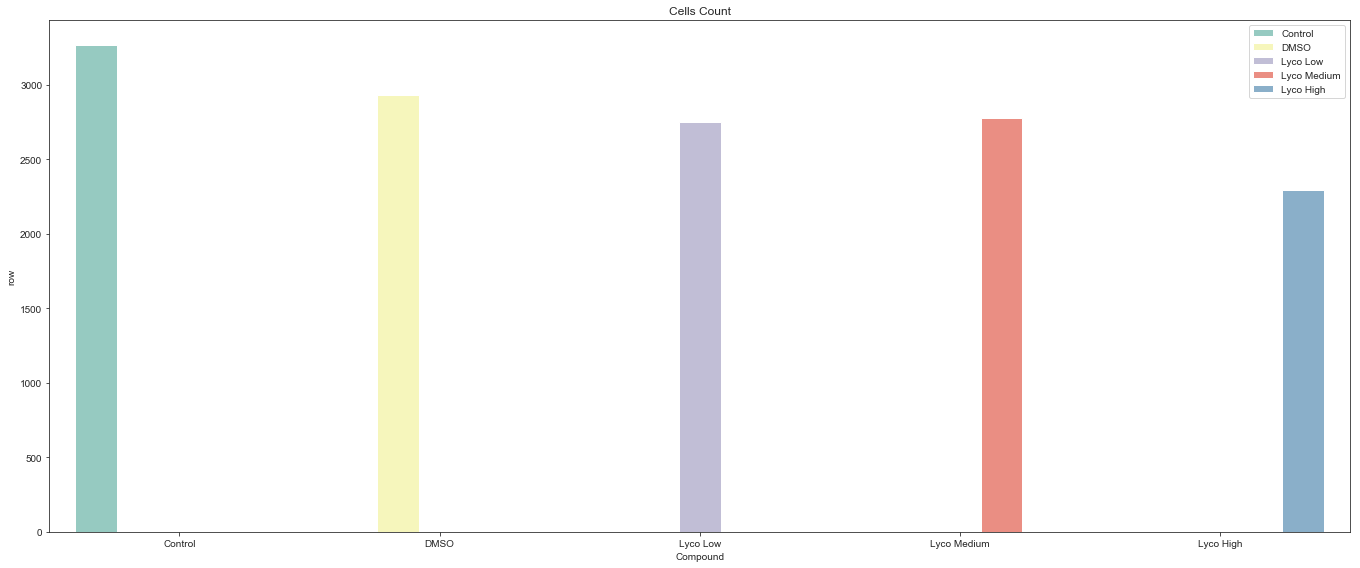

In [12]:
g = df.groupby(['Compound'])["row"].count().reset_index()
display(g)
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Compound", y="row", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order, order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()

## Analyzing the features

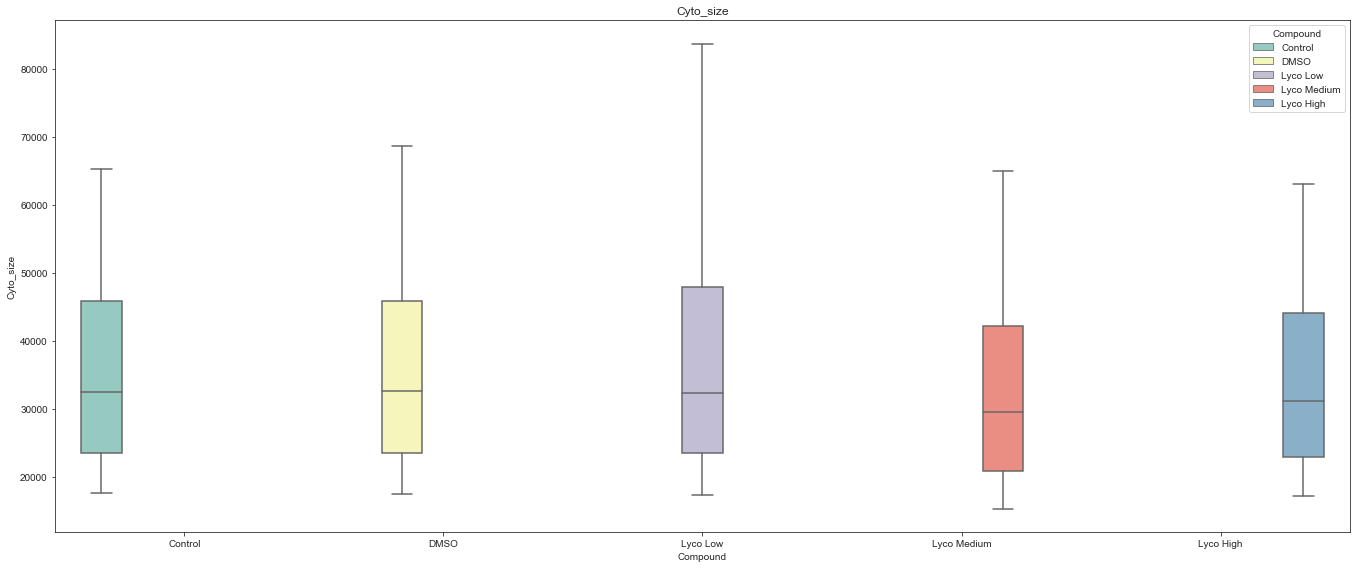

In [13]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cyto_size", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

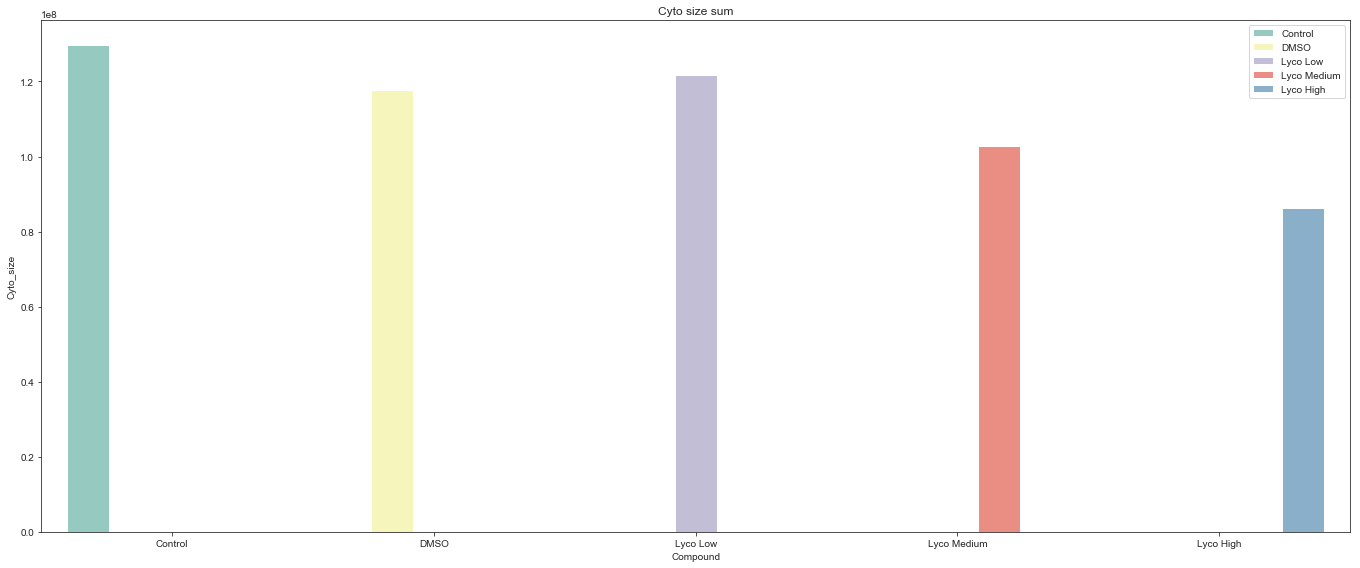

In [14]:
g = df.groupby([ 'Compound'])["Cyto_size"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Compound", y="Cyto_size", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order, order=order);
ax.set_title("Cyto size sum")
ax.legend(loc = 1)
plt.tight_layout()

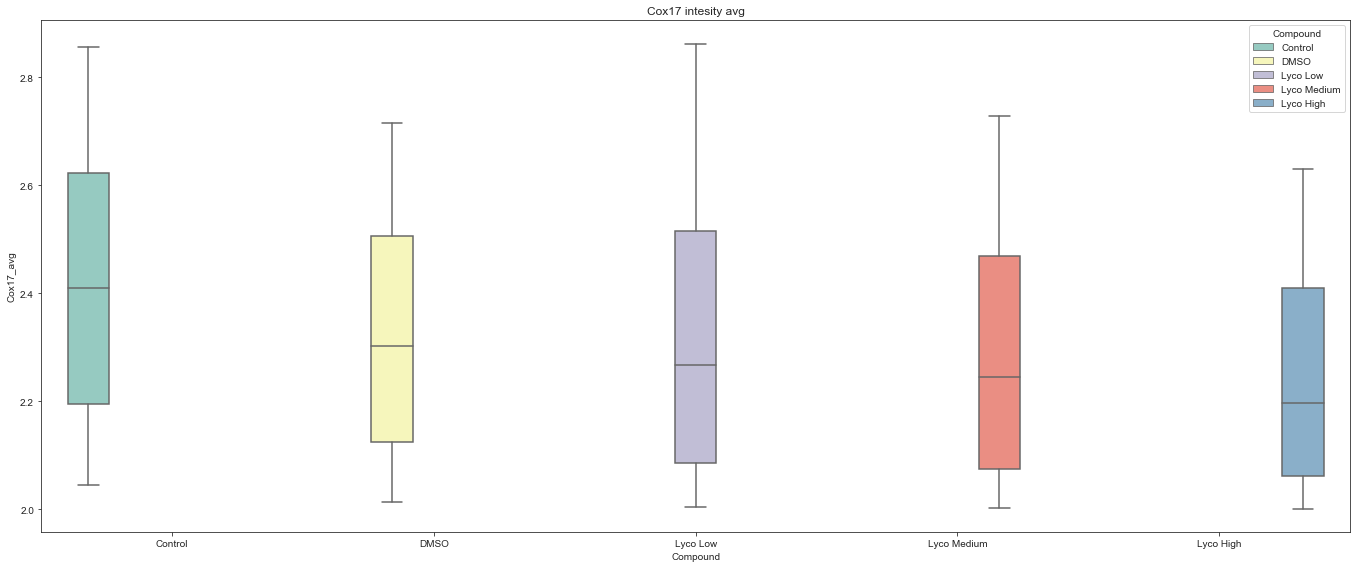

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_avg", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity avg')
plt.tight_layout()

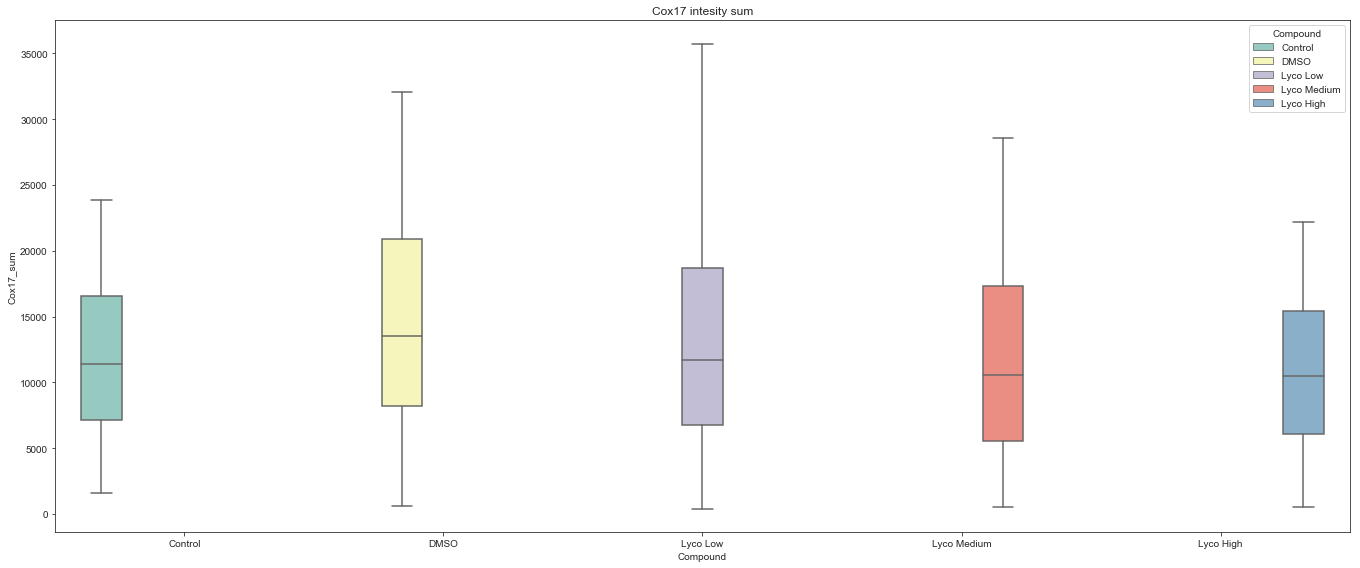

In [16]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity sum')
plt.tight_layout()

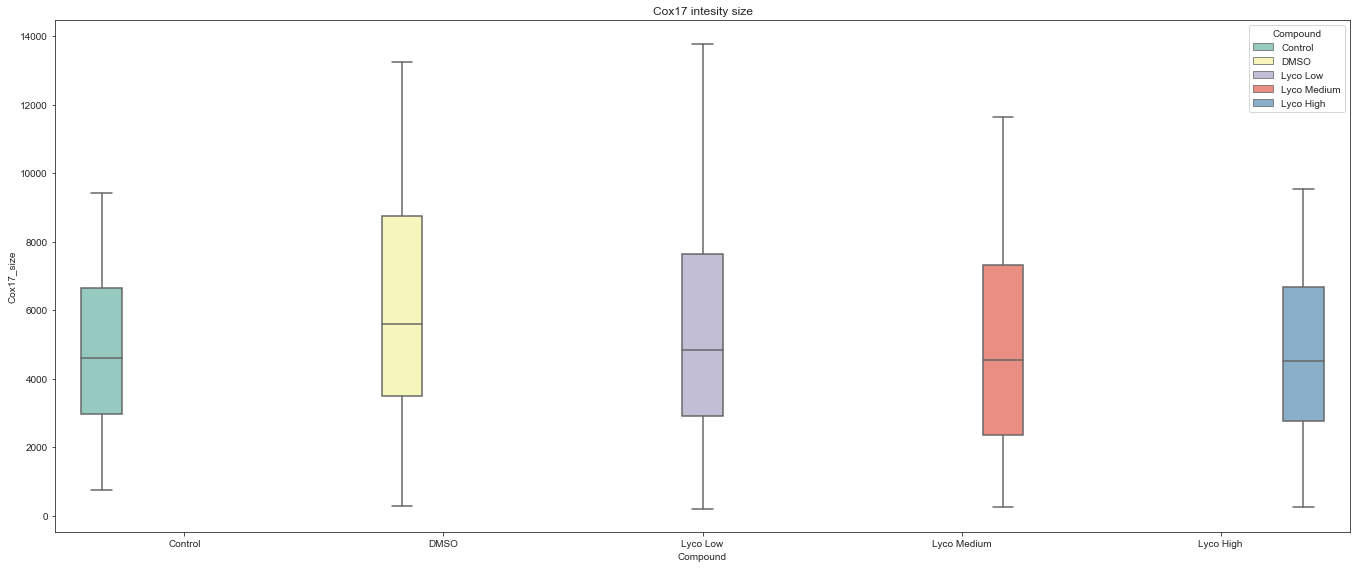

In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_size", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity size')
plt.tight_layout()

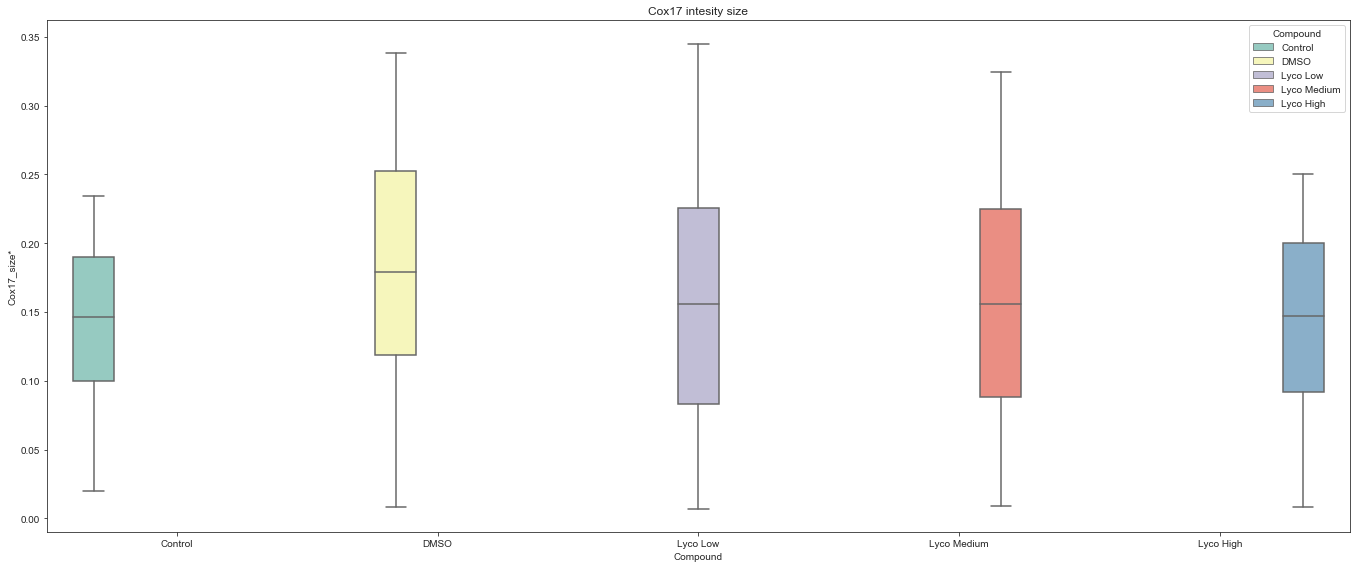

In [19]:
df['Cox17_size*'] = df['Cox17_size']/df['Cyto_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_size*", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity size')
plt.tight_layout()

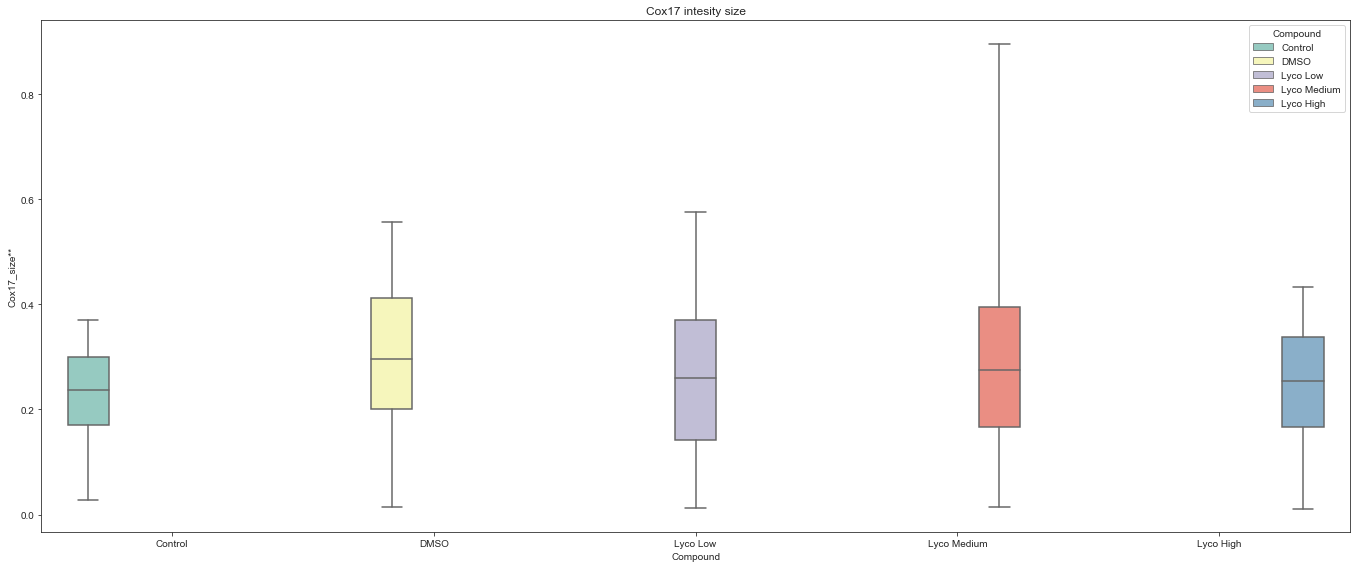

In [20]:
df['Cox17_size**'] = df['Cox17_size']/df['MitoTracker_size_sum']

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_size**", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity size')
plt.tight_layout()

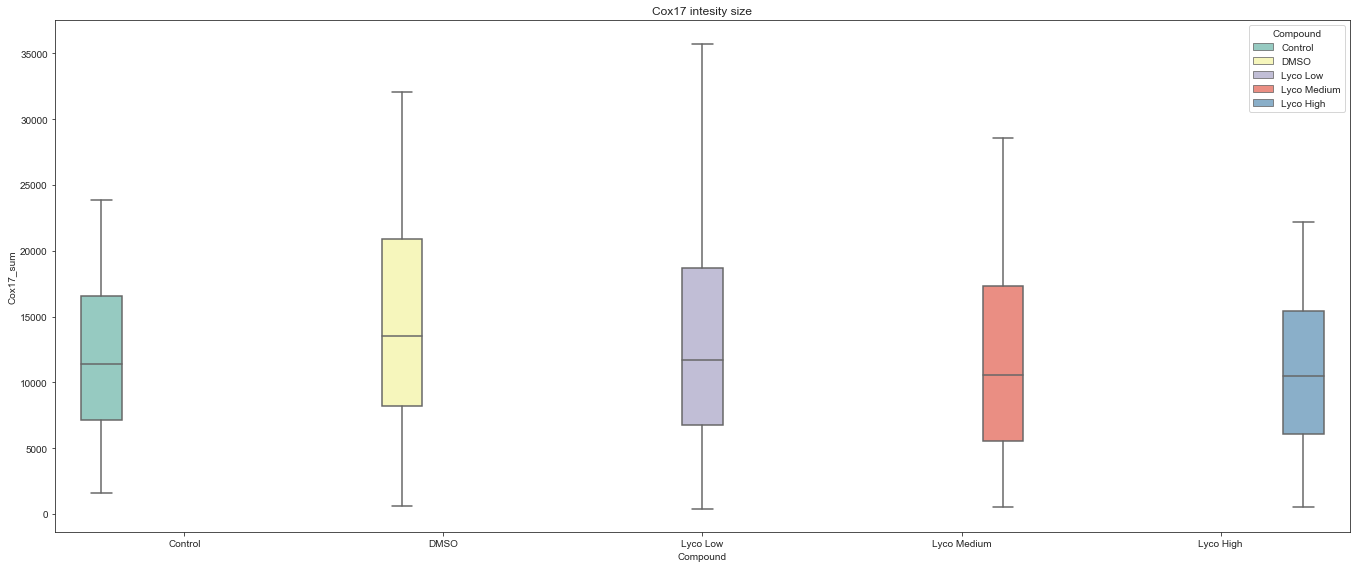

In [21]:
# Cox17 IxA
df['Cox17_sum'] = df['Cox17_avg']*df['Cox17_size']
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity size')
plt.tight_layout()

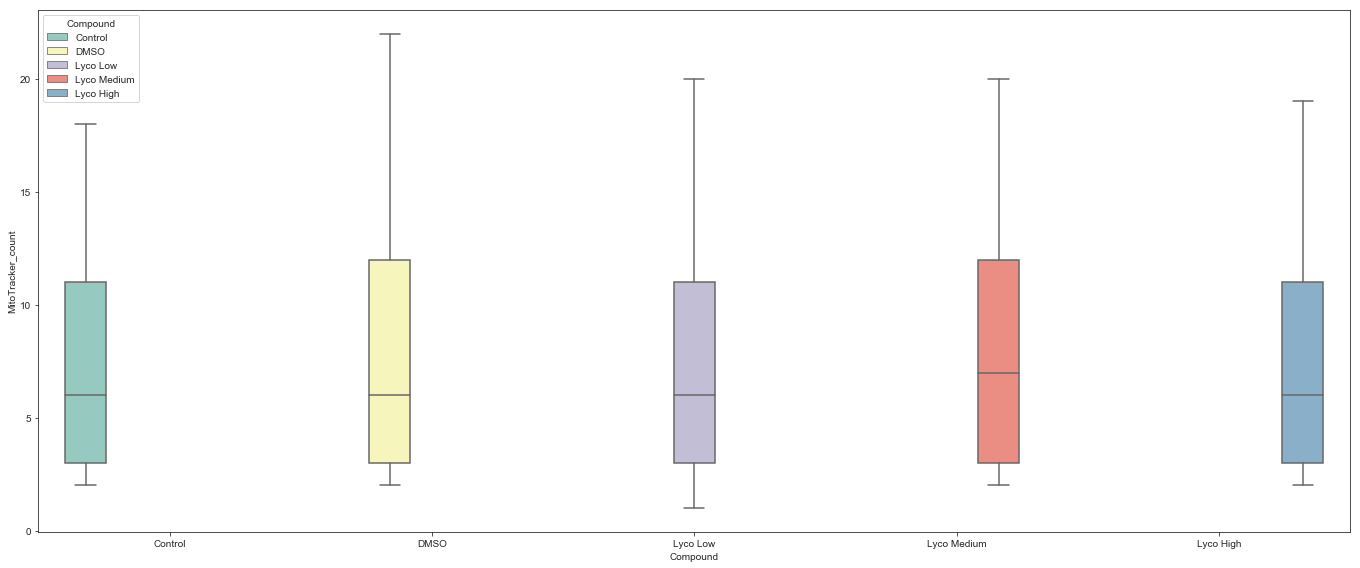

In [22]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="Compound", y="MitoTracker_count", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
plt.tight_layout()

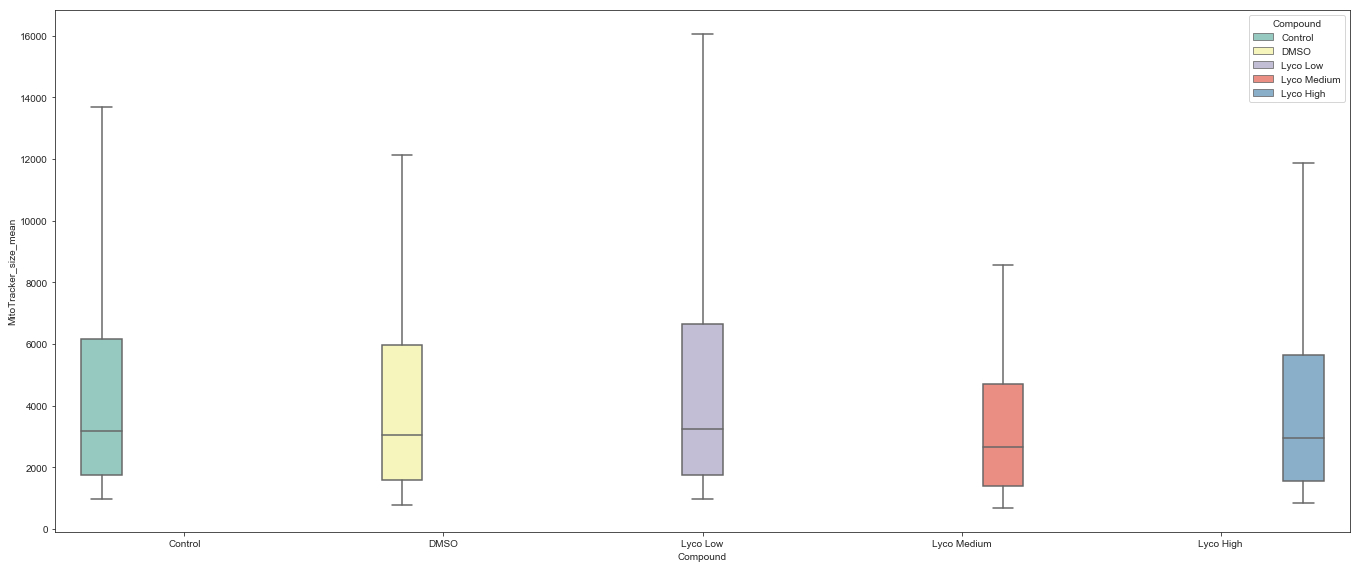

In [23]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="Compound", y="MitoTracker_size_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
plt.tight_layout()

In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="Compound", y="MitoTracker_size_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
plt.tight_layout()

In [25]:
df['MitoTracker_size_sum*'] = df['MitoTracker_size_sum']/df['Cyto_size']
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="Compound", y="MitoTracker_size_sum*", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
plt.tight_layout()

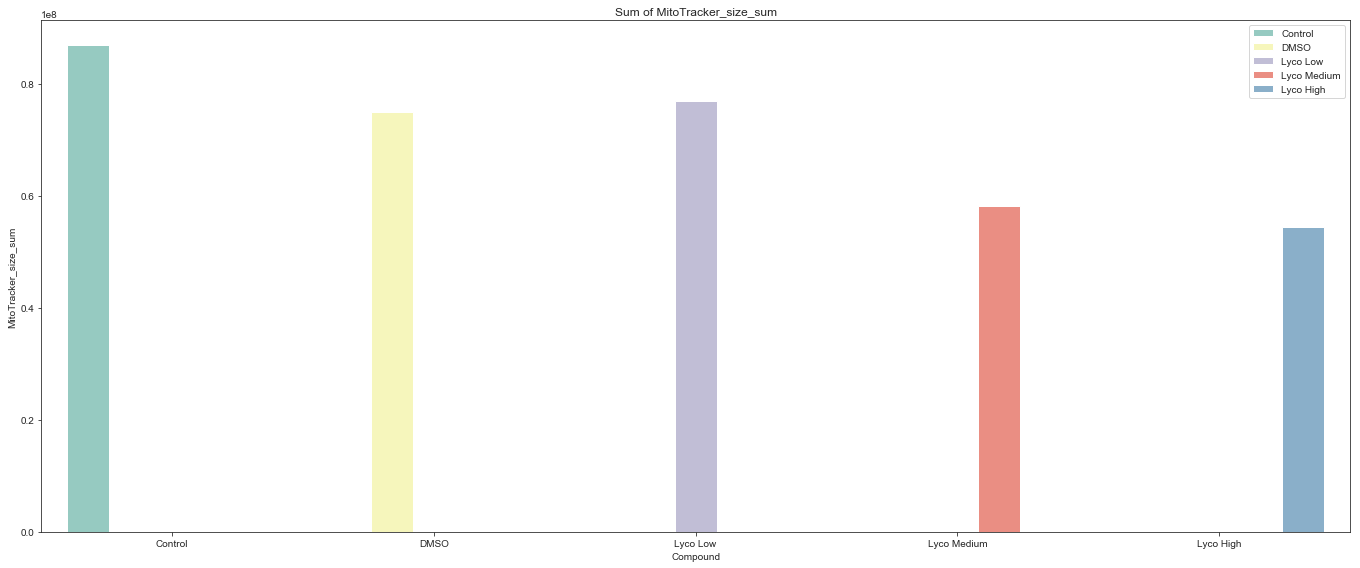

In [26]:
g=df.groupby(['Compound'], as_index=False)["MitoTracker_size_sum"].sum()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=False)
fig.set_size_inches(19, 8)
sns.barplot(x="Compound", y="MitoTracker_size_sum", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order, order=order);
ax.set_title("Sum of MitoTracker_size_sum")
ax.legend(loc = 1)
plt.tight_layout()

In [27]:
g=df.groupby(['Compound'], as_index=False)[["Cox17_in_MitoTracker_size", "Cox17_size"]].sum()
g["Cox17_in_MitoTracker_size_ratio"] = g["Cox17_in_MitoTracker_size"]/g["Cox17_size"]


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=False)
fig.set_size_inches(19, 8)
sns.barplot(x="Compound", y="Cox17_in_MitoTracker_size_ratio", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order, order=order);
ax.set_title("Sum of MitoTracker_size_sum")
ax.legend(loc = 1)
plt.tight_layout()

# Ella's Data

## Loading the data

In [28]:
data_path = "../Data/Lyco/Lyco plate per person 27.03.2019/Ella 24h - agg_results.csv"
df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)

In [29]:
df.sample(7)

Actin_avg  Actin_max  Actin_q10  Actin_q50  Actin_q90  Actin_size  Actin_std  Actin_sum  Cox17_avg  Cox17_in_MitoTracker_avg  Cox17_in_MitoTracker_max  Cox17_in_MitoTracker_q10  Cox17_in_MitoTracker_q50  Cox17_in_MitoTracker_q90  Cox17_in_MitoTracker_size  Cox17_in_MitoTracker_std  Cox17_in_Nucli_avg  Cox17_in_Nucli_max  Cox17_in_Nucli_q10  Cox17_in_Nucli_q50  Cox17_in_Nucli_q90  Cox17_in_Nucli_size  Cox17_in_Nucli_std  Cox17_max  Cox17_outside_MitoTracker_avg  Cox17_outside_MitoTracker_max  Cox17_outside_MitoTracker_q10  Cox17_outside_MitoTracker_q50  Cox17_outside_MitoTracker_q90  Cox17_outside_MitoTracker_size  Cox17_outside_MitoTracker_std  Cox17_outside_Nucli_avg  Cox17_outside_Nucli_max  Cox17_outside_Nucli_q10  Cox17_outside_Nucli_q50  Cox17_outside_Nucli_q90  Cox17_outside_Nucli_size  Cox17_outside_Nucli_std  Cox17_q10  Cox17_q50  Cox17_q90  Cox17_size  Cox17_std  Cox17_sum  Cyto_area  Cyto_aspect_ratio   Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  \
7187    2.665803       11.0        2.0        2.0        4.0      8492.0   1.041844    22638.0   2.084798                  2.085035                       5.0                       2.0                       2.0                       2.0                     3575.0                  0.291679            2.125387                 4.0                 2.0                 2.0                 3.0               1292.0            0.342644        5.0                       2.000000                            2.0                            2.0                            2.0                            2.0                            10.0                       0.000000                 2.061928                      5.0                      2.0                      2.0                      2.0                    2293.0                 0.255089        2.0        2.0        2.0      3585.0   0.291307     7474.0    24420.5           0.518006  24.963025                     0.323484   1345.0   1628.0   
21747   2.535122        7.0        2.0        2.0        3.0      6150.0   0.771222    15591.0   2.089905                  2.089328                       4.0                       2.0                       2.0                       2.0                     1265.0                  0.296096            2.121118                 4.0                 2.0                 2.0                 3.0                644.0            0.335648        4.0                       2.333333                            3.0                            2.0                            2.0                            2.8                             3.0                       0.471405                 2.057692                      4.0                      2.0                      2.0                      2.0                     624.0                 0.246524        2.0        2.0        2.0      1268.0   0.296870     2650.0    17401.0           1.449580  33.482862                     0.156300    455.0    682.0   
1090    3.133739       15.0        2.0        3.0        5.0     10670.0   1.624616    33437.0   2.134849                  2.135433                       5.0                       2.0                       2.0                       3.0                     2540.0                  0.374066            2.078608                 4.0                 2.0                 2.0                 2.0                776.0            0.283127        5.0                       2.000000                            2.0                            2.0                            2.0                            2.0                            11.0                       0.000000                 2.159437                      5.0                      2.0                      2.0                      3.0                    1775.0                 0.404119        2.0        2.0        3.0      2551.0   0.373364     5446.0    22730.5           0.472454  31.507317                     0.076158   1436.0   1016.0   
557     2.892131       12.0        

In [30]:
# Adding Compunds and concentration 
df["Compound"] = np.nan
df.loc[df.column.isin([2, 3]), "Compound"] = "Control"
df.loc[df.column.isin([4, 5]), "Compound"] = "DMSO"
df.loc[df.column.isin([6, 7]), "Compound"] = "Lyco Low"
df.loc[df.column.isin([8, 9]), "Compound"] = "Lyco Medium"
df.loc[df.column.isin([10, 11]), "Compound"] = "Lyco High"
display('ok'if df["Compound"].isna().any()==False else ':-(')

'ok'

In [31]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column       2        3     4     5         6         7            8            9          10         11
row                                                                                                     
B       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
C       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
D       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
E       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
F       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
G       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High

## Number of cells


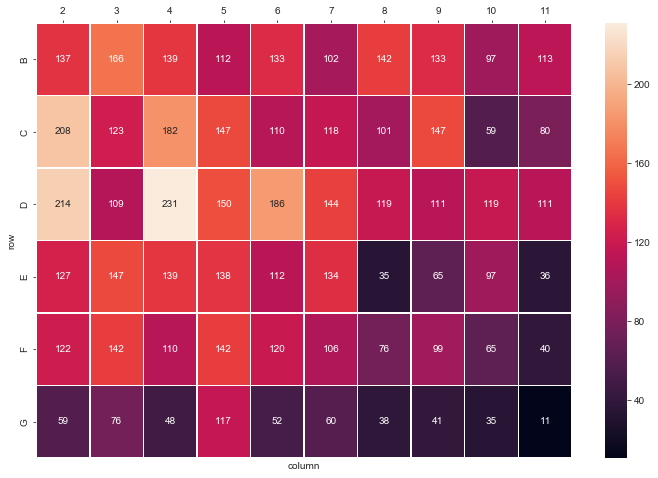

In [32]:
cell_in_well = df.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [33]:
order = ['Control', 'DMSO', 
         'Lyco Low', 'Lyco Medium', 'Lyco High'
        ]

Compound   row
0      Control  1630
1         DMSO  1655
2    Lyco High   863
3     Lyco Low  1377
4  Lyco Medium  1107

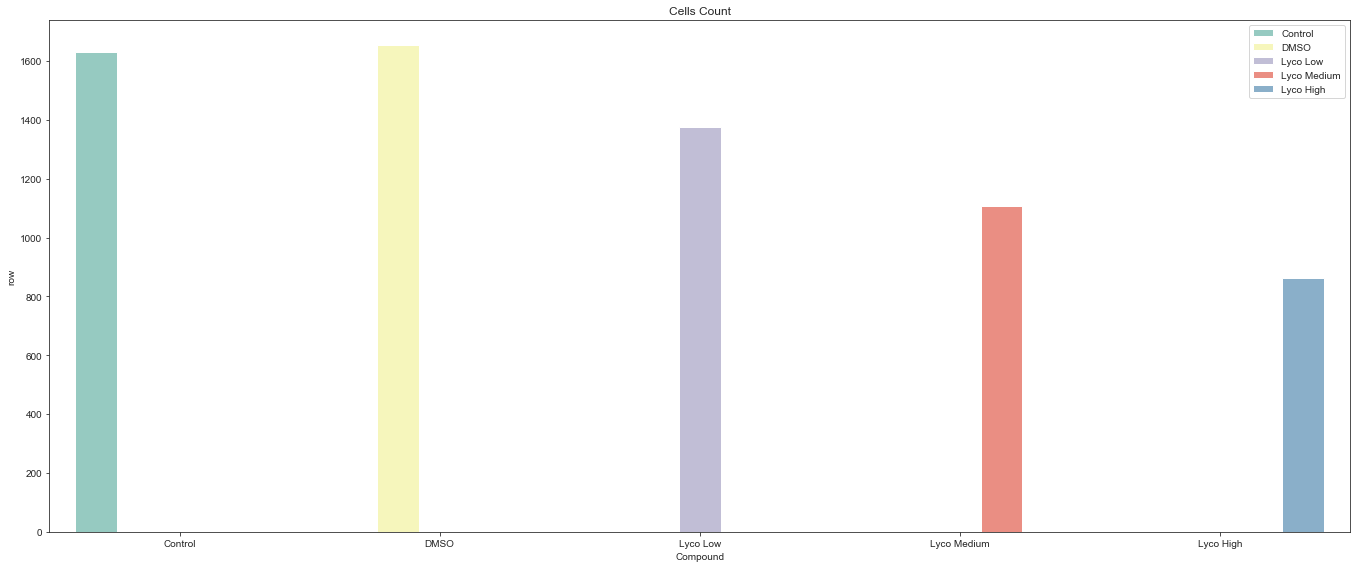

In [34]:
g = df.groupby(['Compound'])["row"].count().reset_index()
display(g)
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Compound", y="row", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order, order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()

## Analyzing the features

In [35]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cyto_size", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

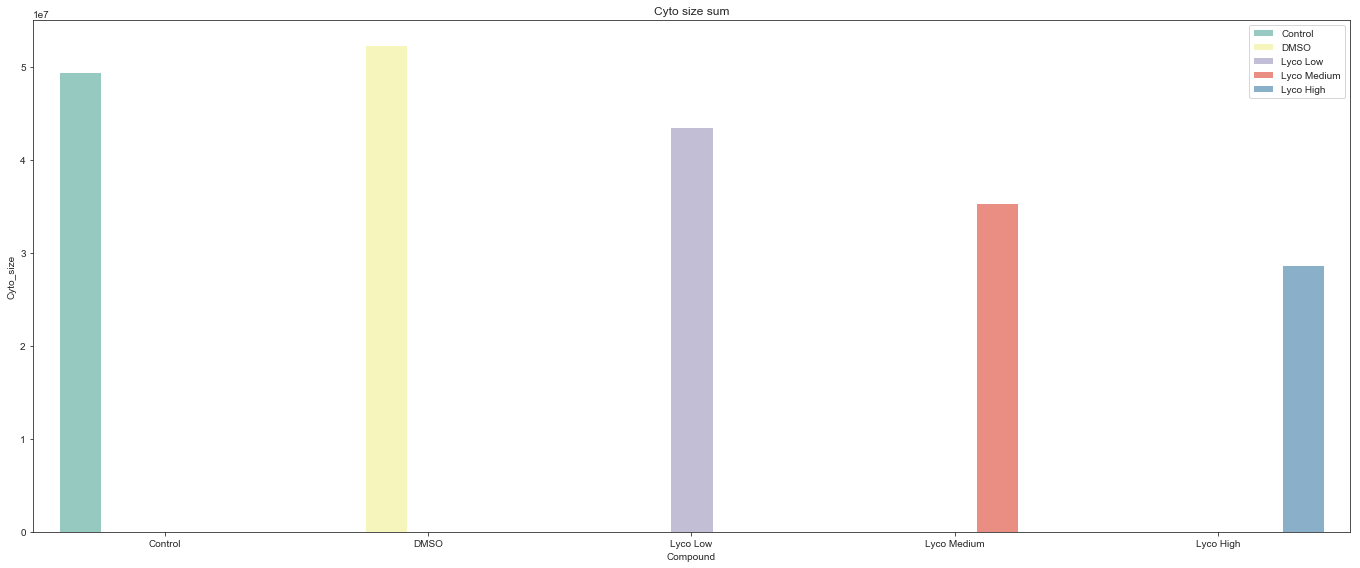

In [36]:
g = df.groupby([ 'Compound'])["Cyto_size"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Compound", y="Cyto_size", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order, order=order);
ax.set_title("Cyto size sum")
ax.legend(loc = 1)
plt.tight_layout()

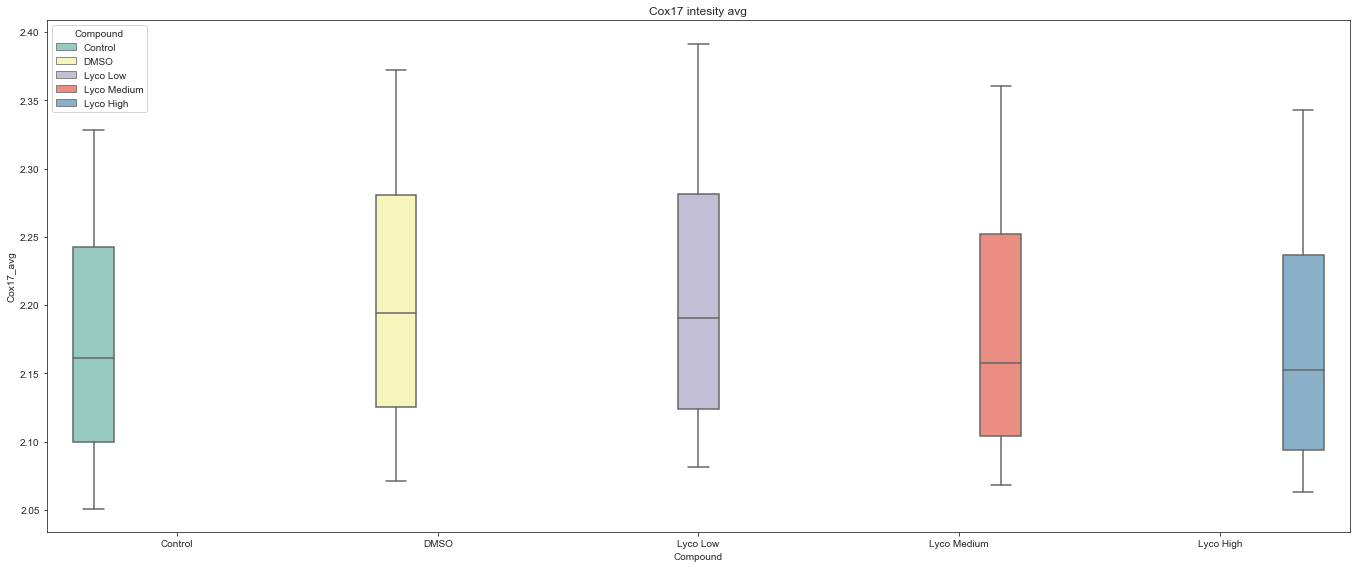

In [38]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_avg", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity avg')
plt.tight_layout()

In [39]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity sum')
plt.tight_layout()

In [40]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_size", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity size')
plt.tight_layout()

In [41]:
df['Cox17_size*'] = df['Cox17_size']/df['Cyto_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_size*", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity size')
plt.tight_layout()

In [42]:
df['Cox17_size**'] = df['Cox17_size']/df['MitoTracker_size_sum']

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_size**", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity size')
plt.tight_layout()

In [43]:

# Cox17 IxA
df['Cox17_sum'] = df['Cox17_avg']*df['Cox17_size']
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
ax.set_title('Cox17 intesity size')
plt.tight_layout()

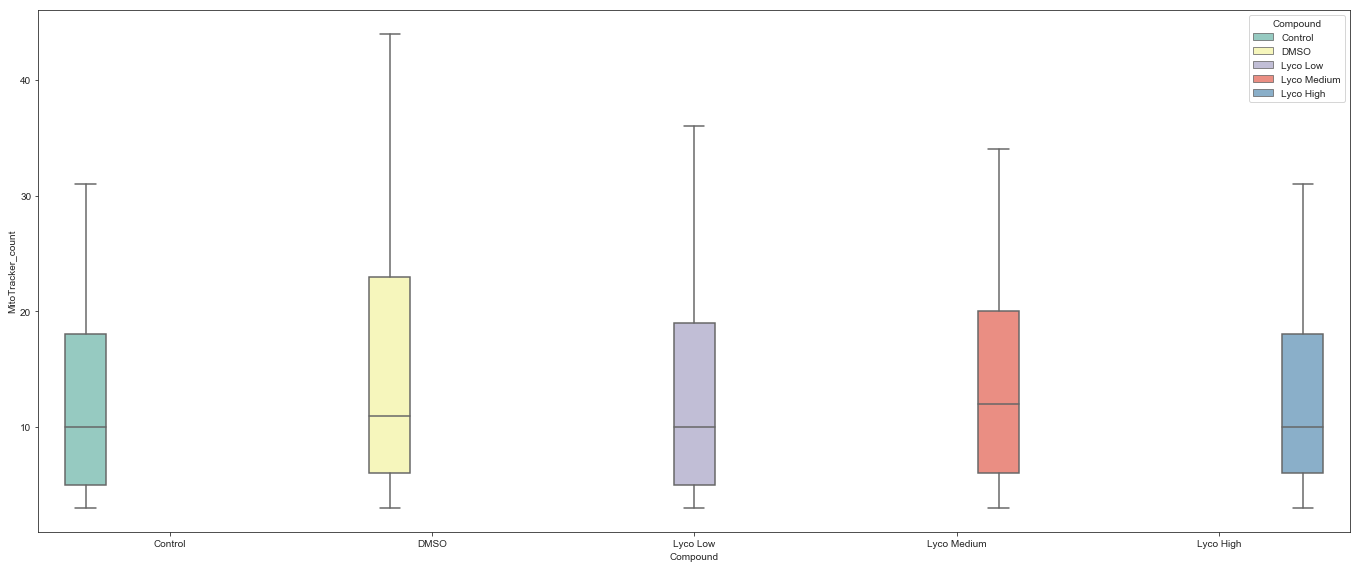

In [44]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="Compound", y="MitoTracker_count", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
plt.tight_layout()

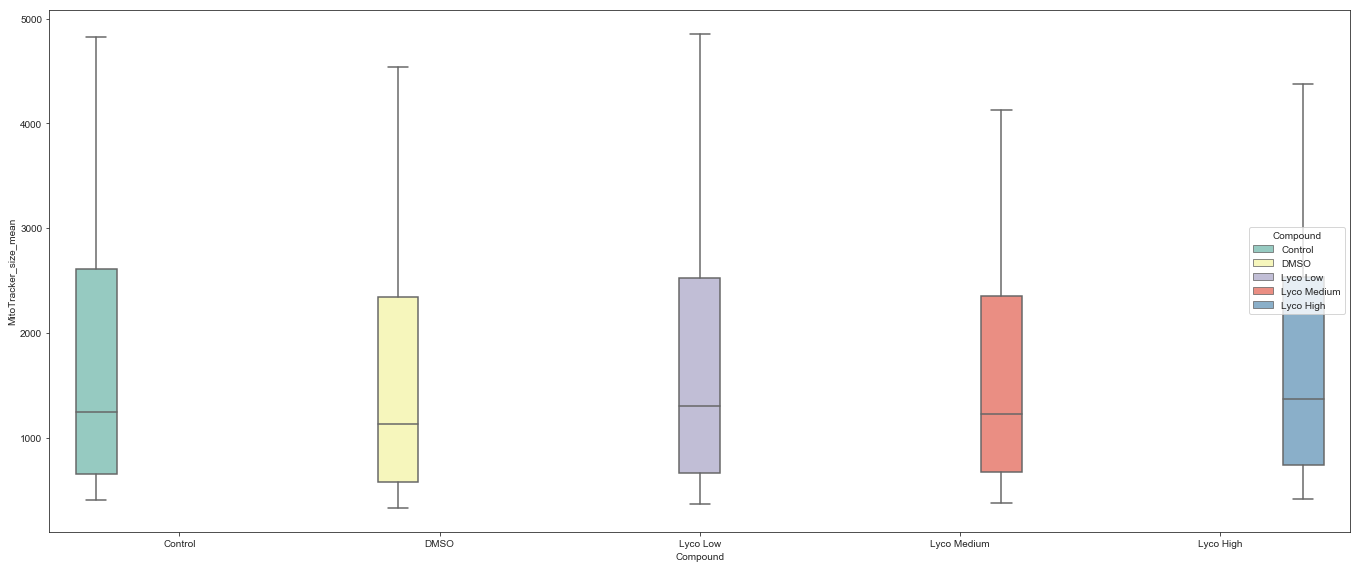

In [46]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="Compound", y="MitoTracker_size_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
plt.tight_layout()

In [47]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="Compound", y="MitoTracker_size_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
plt.tight_layout()

In [48]:
df['MitoTracker_size_sum*'] = df['MitoTracker_size_sum']/df['Cyto_size']
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="Compound", y="MitoTracker_size_sum*", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order, order=order)
plt.tight_layout()

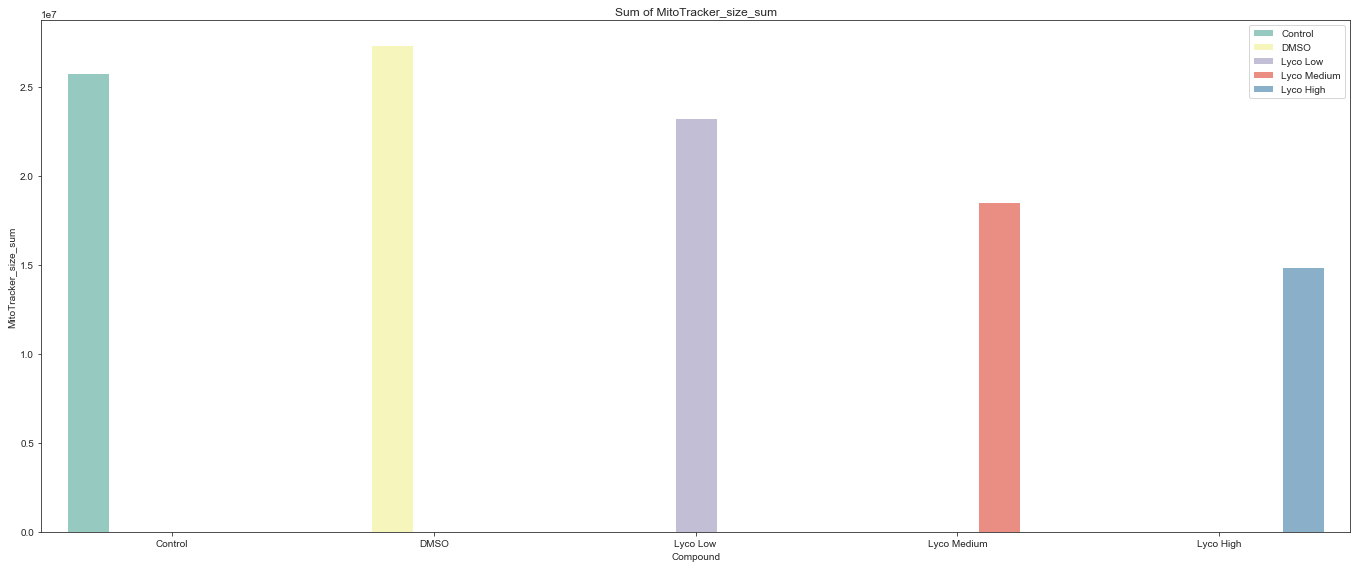

In [49]:

g=df.groupby(['Compound'], as_index=False)["MitoTracker_size_sum"].sum()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=False)
fig.set_size_inches(19, 8)
sns.barplot(x="Compound", y="MitoTracker_size_sum", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order, order=order);
ax.set_title("Sum of MitoTracker_size_sum")
ax.legend(loc = 1)
plt.tight_layout()

In [50]:
g=df.groupby(['Compound'], as_index=False)[["Cox17_in_MitoTracker_size", "Cox17_size"]].sum()
g["Cox17_in_MitoTracker_size_ratio"] = g["Cox17_in_MitoTracker_size"]/g["Cox17_size"]


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=False)
fig.set_size_inches(19, 8)
sns.barplot(x="Compound", y="Cox17_in_MitoTracker_size_ratio", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order, order=order);
ax.set_title("Sum of MitoTracker_size_sum")
ax.legend(loc = 1)
plt.tight_layout()